In [1]:
import import_ipynb
import Neural_Net as nn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math

importing Jupyter notebook from Neural_Net.ipynb


Neural_Net.ipynb:2: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  "cells": [


In [2]:
from tensorflow.contrib.learn.python.learn.estimators._sklearn import train_test_split

# load the dataset
X, Y = nn.load_data()
# split into train and test sets
# split into train and test sets
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.30, random_state=1)

In [3]:
# prepare input data
xtrain_enc, xtest_enc = nn.prepare_inputs(xtrain, xtest)
# prepare output data
ytrain_enc, ytest_enc = nn.prepare_targets(ytrain, ytest)

c:\users\plus sys\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  


In [30]:
from collections import Counter, defaultdict
def occurrences(outcome):
    no_of_examples = len(outcome)
    prob = dict(Counter(outcome))
    for key in prob.keys():
        prob[key] = prob[key] / float(no_of_examples)
    return prob

In [33]:
class_probabilities = occurrences(ytrain_enc)
print((class_probabilities))

{1: 0.3, 0: 0.7}


In [49]:
def naive_bayes(xtrain_enc, ytrain_enc, new_sample):
    classes     = np.unique(ytrain_enc)
    rows, cols  = np.shape(xtrain_enc)
    likelihoods = {}
    for cls in classes:
        #initializing the dictionary
        likelihoods[cls] = defaultdict(list)


    for cls in classes:
        #taking samples of only 1 class at a time
        row_indices = np.where(ytrain_enc == cls)[0]
        subset = xtrain_enc[row_indices, :]
        r, c = np.shape(subset)
        for j in range(0, c):
            likelihoods[cls][j] += list(subset[:,j])    

    for cls in classes:
        for j in range(0,c):
            likelihoods[cls][j] = occurrences(likelihoods[cls][j])
    results = {}

    for cls in classes:
        class_probability = class_probabilities[cls]
        for i in range(0,len(new_sample)):
            relative_feature_values = likelihoods[cls][i]
            if new_sample[i] in relative_feature_values.keys():
                class_probability *= relative_feature_values[new_sample[i]]
            else:
                class_probability *= 0
        results[cls] = class_probability
    return results

            predicted cancer  predicted no cancer
has cancer                 8                   17
no cancer                 15                   46

Accuracy: 0.627906976744186 



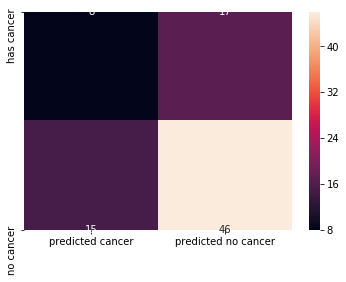

In [111]:
c = 0
f = 0
ypred = []
for i in range(len(ytest_enc)):
    result = naive_bayes(xtrain_enc,ytrain_enc,xtest_enc[i])
    
    #get the value of the class with highest value
    p = max(result.values())
    per = list(result.keys())[list(result.values()).index(p)]
    ypred.append(per)


from sklearn.metrics import confusion_matrix 
from sklearn import metrics

cm = np.array(confusion_matrix(ytest_enc,ypred, labels =[1,0]))
confusion = pd.DataFrame(cm, index = ['has cancer','no cancer'], columns= ['predicted cancer', 'predicted no cancer'])
print(confusion)
sns.heatmap(confusion, annot = True)
    
print("\nAccuracy:",metrics.accuracy_score(ytest_enc, ypred),"\n")